In [2]:
import numpy as np
import xgcm
from xgcm import Grid
from xhistogram.xarray import histogram
import xarray as xr
import xroms
from scipy import signal
import matplotlib.pyplot as plt
import glob

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo

plt.rcParams.update({'font.size': 14})

### Load in all the budgets and both the hourly and nested grid outputs

In [3]:
paths = ['/scratch/user/dylan.schlichting/TXLA_Outputs/nested_10min/ocean_his_child_00001.nc',
         '/scratch/user/dylan.schlichting/TXLA_Outputs/nested_10min/ocean_his_child_00002.nc',
         '/scratch/user/dylan.schlichting/TXLA_Outputs/nested_10min/ocean_his_child_00003.nc',
         '/scratch/user/dylan.schlichting/TXLA_Outputs/nested_10min/ocean_his_child_00004.nc',
         '/scratch/user/dylan.schlichting/TXLA_Outputs/nested_10min/ocean_his_child_00005.nc',
        ]
paths1 = ['/scratch/user/dylan.schlichting/TXLA_Outputs/nested_hourly/ocean_his_child_00001.nc',
          '/scratch/user/dylan.schlichting/TXLA_Outputs/nested_hourly/ocean_his_child_00002.nc',
          '/scratch/user/dylan.schlichting/TXLA_Outputs/nested_hourly/ocean_his_child_00003.nc',
        ]

ds_10min = xroms.open_mfnetcdf(paths, 
                                chunks = {'ocean_time':1})
ds_10min, grid_hourly = xroms.roms_dataset(ds_10min, 
                                     Vtransform = None)

ds_hourly = xroms.open_mfnetcdf(paths1, 
                                chunks = {'ocean_time':1})
ds_hourly, grid_10min = xroms.roms_dataset(ds_hourly, 
                                     Vtransform = None)

xislice=slice(50,250) #note tendencies have x+1 stopping points
etaslice=slice(150,350)

#Open tef, tendency terms, and chi for hourly and 10 min history file frequency
tef_hourly = xr.open_dataset('/scratch/user/dylan.schlichting/tef/outputs/transports/xi_50_250_eta_150_350/tef_nested_hourly_xi_50_250_eta_150_350.nc')
tendencies_hourly = xr.open_dataset('/scratch/user/dylan.schlichting/tef/outputs/tendencies/xi_50_250_eta_150_350/tendencies_nested_hourly_xi_50_250_eta_150_350.nc')
chi_hourly = xr.open_dataset('/scratch/user/dylan.schlichting/tef/outputs/mixing/xi_50_250_eta_150_350/dissipation_nested_hourly_xi50250_eta150350.nc')

tef_10min = xr.open_dataset('/scratch/user/dylan.schlichting/tef/outputs/transports/xi_50_250_eta_150_350/tef_nested_10min_xi_50_250_eta_150_350.nc')
tendencies_10min = xr.open_dataset('/scratch/user/dylan.schlichting/tef/outputs/tendencies/xi_50_250_eta_150_350/tendencies_nested_10min_xi_50_250_eta_150_350.nc')
chi_10min = xr.open_dataset('../outputs/mixing/xi_50_250_eta_150_350/dissipation_histogram_10min_xi50250_eta150350_sbin200.nc')

tef_10min_s200 = xr.open_dataset('/scratch/user/dylan.schlichting/tef/outputs/transports/xi_50_250_eta_150_350/tef_nested_10min_xi_50_250_eta_150_350_s200.nc')
tef_10min_s500 = xr.open_dataset('/scratch/user/dylan.schlichting/tef/outputs/transports/xi_50_250_eta_150_350/tef_nested_10min_xi_50_250_eta_150_350_s500.nc')
chi_10min_s500 = xr.open_dataset('/scratch/user/dylan.schlichting/tef/outputs/mixing/xi_50_250_eta_150_350/dissipation_histogram_10min_xi50250_eta150350_sbin500.nc')


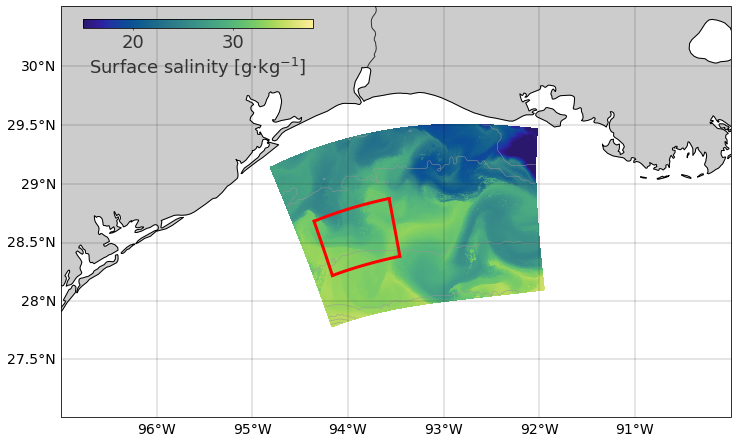

### Compare different number of salinity bins for both volume transport and salinity variance transport

Text(0.5, 1.0, 'Volumetric Transport - 500 bins [m$^3$ s$^{-1}]$')

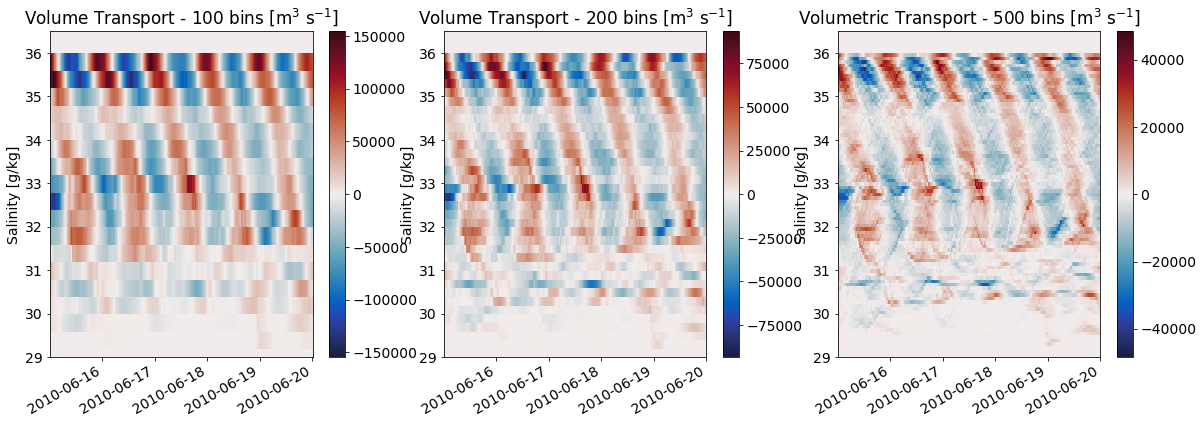

In [36]:
fig, ax = plt.subplots(1,3, figsize = (20,6))

tef_10min.Qnet.plot(y = 'salt_bin', 
                    cmap = cmo.balance,
                    ax = ax[0],
                    cbar_kwargs = {'label': ''})

tef_10min_s200.Qnet.plot(y = 'salt_bin', 
                        cmap = cmo.balance,
                        ax = ax[1],
                        cbar_kwargs = {'label': ''})

tef_10min_s500.Qnet.plot(y = 'salt_bin', 
                        cmap = cmo.balance,
                        ax = ax[2],
                        cbar_kwargs = {'label': ''})

ax[0].set_xlabel('')
ax[0].set_ylabel('Salinity [g/kg]')
ax[0].set_ylim(29,36.5)
ax[0].set_title('Volume Transport - 100 bins [m$^3$ s$^{-1}]$')

ax[1].set_xlabel('')
ax[1].set_ylabel('Salinity [g/kg]')
ax[1].set_ylim(29,36.5)
ax[1].set_title('Volume Transport - 200 bins [m$^3$ s$^{-1}]$')

ax[2].set_xlabel('')
ax[2].set_ylabel('Salinity [g/kg]')
ax[2].set_ylim(29,36.5)
ax[2].set_title('Volumetric Transport - 500 bins [m$^3$ s$^{-1}]$')

### Transported weighted histograms for nested model

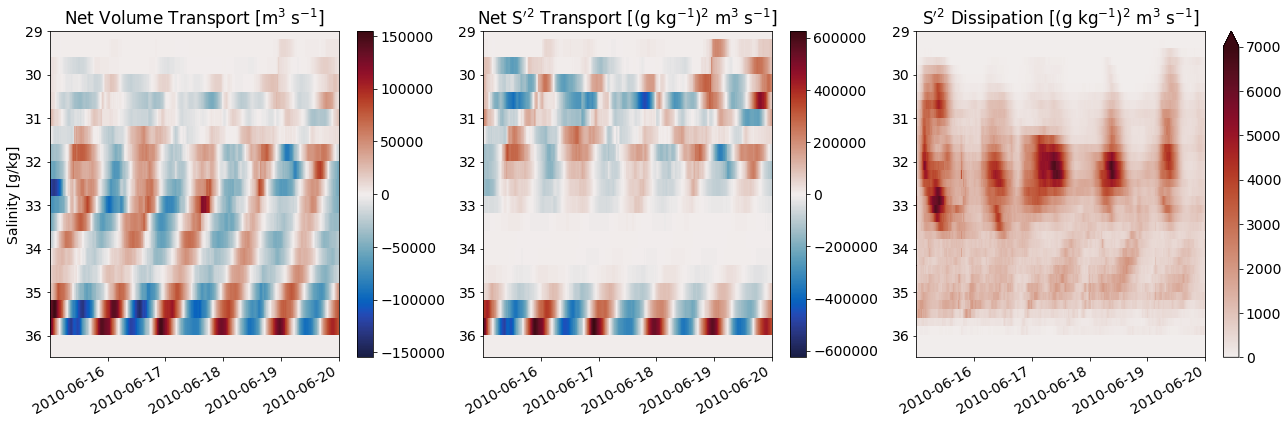

In [5]:
fig, ax = plt.subplots(1,3, figsize = (22,6))

tef_10min.Qnet.plot(y = 'salt_bin', 
                    cmap = cmo.balance,
                    ax = ax[0],
                    cbar_kwargs = {'label': ''})

tef_10min.Qsvarnet.plot(y = 'salt_bin', 
                    cmap = cmo.balance,
                    ax = ax[1],
                    cbar_kwargs = {'label': ''})

chi_10min.histogram_salt.plot(y = 'salt_bin',
                        cmap = cmo.amp,
                        ax = ax[2],
                        vmin = 0,
                        vmax = 7000,
                        cbar_kwargs = {'label': ''})

plt.ylim(29,36.5)
plt.gca().invert_yaxis()

ax[0].set_xlabel('')
ax[0].set_ylabel('Salinity [g/kg]')
ax[0].set_ylim(29,36.5)
ax[0].set_title('Net Volume Transport [m$^3$ s$^{-1}]$')

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(29,36.5)
ax[1].set_title('Net S$^\prime{^2}$ Transport [(g kg$^{-1}$)$^2$ m$^3$ s$^{-1}]$')

ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_ylim(29,36.5)
ax[2].set_title(r'S$^\prime{^2}$ Dissipation [(g kg$^{-1}$)$^2$ m$^3$ s$^{-1}]$')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

### Let's try to get a sense of these numbers. The governing equations are: 
r$Q = \int_A \textbf{u} \cdot dA$ 

In [4]:
xislice=slice(50,250) #note tendencies have x+1 stopping points
etaslice=slice(150,350)

subset = ds_10min.isel(eta_rho = etaslice, xi_rho = xislice, xi_u = xislice, eta_v = etaslice)

Text(0.5, 1.0, 'Depth [m]')

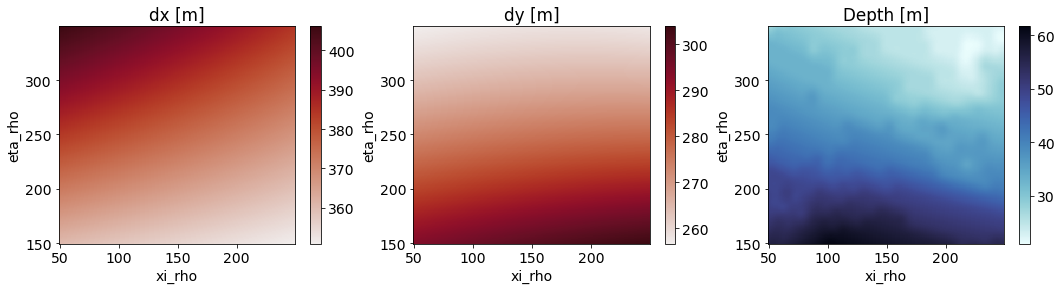

In [7]:
fig, ax = plt.subplots(1,3, figsize = (18,4))

subset.dx.plot(ax = ax[0], cmap = cmo.amp, cbar_kwargs = {'label': ''})
subset.dy.plot(ax = ax[1], cmap = cmo.amp, cbar_kwargs = {'label': ''})
subset.h.plot(ax = ax[2], cmap = cmo.ice_r, cbar_kwargs = {'label': ''})

ax[0].set_title('dx [m]')
ax[1].set_title('dy [m]')
ax[2].set_title('Depth [m]')

(array([9.0000e+00, 1.3000e+01, 1.4200e+02, 5.1600e+02, 1.3910e+03,
        2.3180e+03, 3.3230e+03, 4.1310e+03, 5.8330e+03, 8.2670e+03,
        1.1995e+04, 1.6431e+04, 2.0521e+04, 2.4201e+04, 2.7530e+04,
        3.2973e+04, 3.9478e+04, 4.3110e+04, 4.5227e+04, 4.7383e+04,
        4.9202e+04, 5.1336e+04, 5.4663e+04, 6.0674e+04, 6.8101e+04,
        7.6250e+04, 8.2742e+04, 8.1638e+04, 7.1573e+04, 6.2192e+04,
        5.1056e+04, 3.9084e+04, 2.9128e+04, 2.2336e+04, 1.6967e+04,
        1.2634e+04, 8.8280e+03, 6.8980e+03, 5.6750e+03, 4.6570e+03,
        3.7490e+03, 2.5160e+03, 1.6620e+03, 9.4900e+02, 4.0000e+02,
        1.6000e+02, 7.9000e+01, 3.5000e+01, 1.7000e+01, 7.0000e+00]),
 array([-0.5922331 , -0.56959987, -0.5469667 , -0.5243334 , -0.50170016,
        -0.47906694, -0.4564337 , -0.43380046, -0.41116723, -0.388534  ,
        -0.36590075, -0.34326753, -0.3206343 , -0.29800105, -0.27536783,
        -0.2527346 , -0.23010135, -0.20746812, -0.18483488, -0.16220164,
        -0.13956842, -0.11

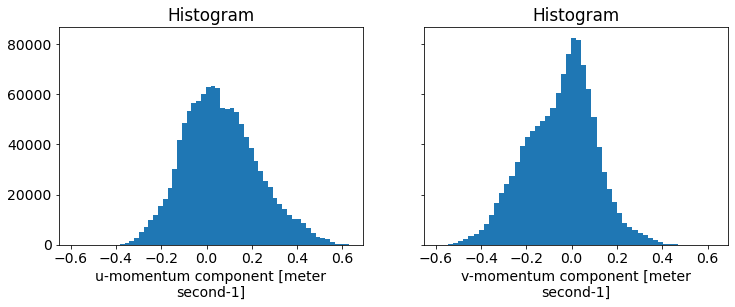

In [8]:
fig, ax = plt.subplots(1,2, figsize = (12,4), sharex = True, sharey = True)

subset.u[0].plot(ax = ax[0], bins = 50)
subset.v[1].plot(ax = ax[1], bins = 50)

Estimate the magnitude of the boundary area. Pictured below is the control volume

In [5]:
Au = subset.dz_u*subset.dy_u
Av = subset.dz_v*subset.dx_v

Au = Au.sel(eta_rho = etaslice, xi_u = slice(xislice.start-1, xislice.stop))
Av = Av.sel(eta_v = slice(etaslice.start-1, etaslice.stop), xi_rho = xislice)

AW = Au.isel(xi_u = 0) #west
AE = Au.isel(xi_u = -1) #east
AN = Av.isel(eta_v = -1) #top
AS = Av.isel(eta_v = 0) #bottom

AW.name = 'QW'
AE.name = 'QE'
AN.name = 'QN'
AS.name = 'QS'

In [16]:
subset.u.mean().values

array(0.07196405, dtype=float32)

In [10]:
Au.max().values

array(1950.45769069)

In [11]:
Av.max().values

array(2346.76343068)

### Maximum area is about 2300 m$^3$, with maximum velocity about 0.6 m/s, meaning the maximum instantaneous volume transport at each grid cell is about 1380 m^3/s

In [12]:
Area = (subset.dx*subset.dy).sum().values / (1e6)
Area

4153.819829233909

In [13]:
print(np.sqrt(4153), 'Box Area [km^2]')

64.4437739428721 Box Area [km^2]


In [14]:
print(subset.lat_rho.min().values, 'minimum latitude')
print(subset.lat_rho.max().values, 'maximum latitude')
print(subset.lon_rho.min().values, 'minimum longitude')
print(subset.lon_rho.max().values, 'maximum longitude')

28.2197118582405 minimum latitude
28.872056649226348 maximum latitude
-94.35076676082754 minimum longitude
-93.46276173908551 maximum longitude


### Using an online calculator, the distance between the corners of the box is about 113 km

### Next, let's plot some of the forcing to get see how it impacts the histograms

In [31]:
dss = xr.open_dataset('/scratch/user/dylan.schlichting/TXLA_Outputs/txla2_frc_ERAI_nest.nc')

dss = dss.sel(time = slice('2010-06-15 00:00:00', '2010-06-20 00:00:00')) \
         .isel(xi_rho = xislice, eta_rho = etaslice,
               xi_u = slice(xislice.start-1, xislice.stop),
               eta_v = slice(etaslice.start-1, etaslice.stop))

swflux = dss.swflux.resample(time = '10min').interpolate('linear')

#hourly resampling 
# dss = dss.sel(time = slice('2010-06-02 23:00:00', '2010-07-18 00:00:00')) \
#          .isel(xi_rho = xislice, eta_rho = etaslice)

# swflux = dss.swflux.resample(time = '1h').interpolate('linear') #one extra time step at beginning, cut it.

swflux = (swflux[2:]/100)/86400 #convert from cm/d to m/s
dA = (ds_10min.dx*ds_10min.dy).isel(eta_rho = etaslice, xi_rho = xislice)
swflux = (swflux*dA).sum(dim = ['eta_rho','xi_rho']).load()

Text(0.5, 1.0, 'Vwind [m]')

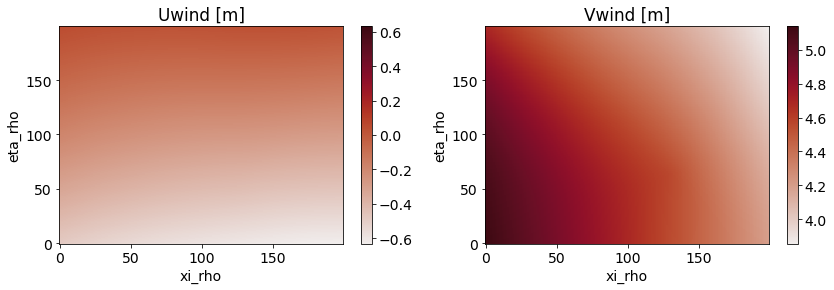

In [25]:
fig, ax = plt.subplots(1,2, figsize = (14,4))

dss.Uwind[20].plot(ax = ax[0], cmap = cmo.amp, cbar_kwargs = {'label': ''})
dss.Vwind[20].plot(ax = ax[1], cmap = cmo.amp, cbar_kwargs = {'label': ''})
# dss.h.plot(ax = ax[2], cmap = cmo.ice_r, cbar_kwargs = {'label': ''})

ax[0].set_title('Uwind [m]')
ax[1].set_title('Vwind [m]')

# dss.Uwind[].plot(cmap = cmo.amp)

In [29]:
dss.sustr

<xarray.DataArray 'sustr' (time: 41, eta_u: 602, xi_u: 676)>
[16685032 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2010-06-15 2010-06-15T03:00:00 ... 2010-06-20
Dimensions without coordinates: eta_u, xi_u
Attributes:
    long_name:  surface u-momentum stress
    units:      Newton metre-2
    time:       time